# Analysis of ETF predictive models based on commonly used financial measures

### Loading dependencies 

In [90]:
import pandas as pd 
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt

### Loading Dataset and preliminary cleaning 

In [2]:
df = pd.read_pickle('/Users/diegoaub/Documents/Project/PKL/Dataframe.pkl')
df = df.groupby(['fund_symbol']).last()
df = df.drop(axis=1, labels = df.columns[[0,2,9]])

### Showing correlation between variables

<AxesSubplot:>

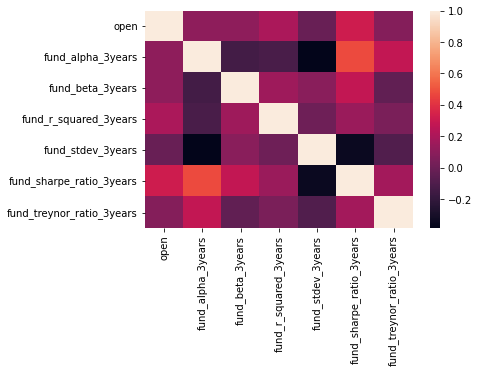

In [111]:
sns.heatmap(df.corr())

The diagonal line showing complete correlaton is just a consequence of a variable interacting with itself. 
It seemes like the sharpe ratio holds some significance while most other values are fairly irrelevant. 

### Splitting dataset into train and test models

In [115]:
indep = df[df.columns[1:7]]
dep = df[df.columns[0:1]]
x_train, x_test, y_train, y_test  = train_test_split(indep,dep,test_size=0.2, random_state=1)

# Creating linear model

In [116]:
%%capture
model_linear = linear_model.LinearRegression()
model_linear.fit(x_train, y_train)

### Showing coefficients and intercepts

The coefficients of this model are the following:

In [117]:
print(model_linear.coef_)

[[-2.23172777e-02 -4.13574321e-01  3.01135814e-01  2.88232309e-01
   3.87802634e+01  6.91259867e-02]]


The intercept of this model is the following:

In [118]:
print(model_linear.intercept_)

[10.78689736]


### Showing signifinace of variables

The following is a measure of the relevance of each variable in the model

In [119]:
importance_linear = model_linear.coef_[0]
for x in range(0,len(importance_linear)):
    print(f'Score:{importance_linear[x].round(5)} \nFeature:{x_train.columns[x]}\n')

Score:-0.02232 
Feature:fund_alpha_3years

Score:-0.41357 
Feature:fund_beta_3years

Score:0.30114 
Feature:fund_r_squared_3years

Score:0.28823 
Feature:fund_stdev_3years

Score:38.78026 
Feature:fund_sharpe_ratio_3years

Score:0.06913 
Feature:fund_treynor_ratio_3years



### Comparing model to original data

In [120]:
y_predict_linear = model_linear.predict(x_test)

In [121]:
r2_score(y_test,y_predict_linear)

0.1200504739666034

The model showed an r2 score of about 12%. This is pretty low. These measures cannot be used to accurately determine the price of an ETF. 

### Visually comparing r2 of variables

<BarContainer object of 6 artists>

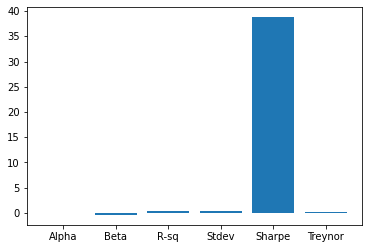

In [122]:
pyplot.bar(['Alpha','Beta','R-sq','Stdev','Sharpe','Treynor'], importance_linear)

### Plotting difference between predicted and real values

<AxesSubplot:ylabel='Count'>

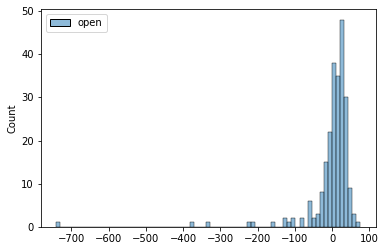

In [123]:
sns.histplot(y_predict_linear-y_test)

This histogram shows that most predictions where plus or minus 100 from real values, while there are a few outliers. In the context of this analysis these findings confirm that the commonly used financial measures do not provide a worthwhile prediction of the price of an ETF.  

### Plotting real values to predicted values

(0.0, 200.0)

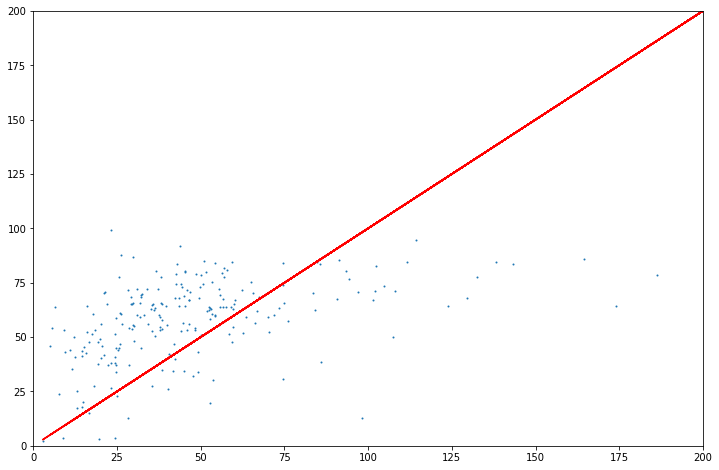

In [133]:
plt.subplots(figsize=(12,8))
plt.scatter(y_test,y_predict_linear,s=1)
plt.plot(y_test,y_test,color='red')
plt.xlim([0,200])
plt.ylim([0,200])

### Conclusion

With the given values, a consistent prediction of ETF prices could not be created. The reason might be due to the prices of ETF being largely based on the financial intstruments that make them up, rather than by the sheer forces of supply and demand of the actual ETF. Perhaps a similar model could provide better results if actual stocks were to be observed. 

Any attempt at a predicition of ETF prices might not be worthwhile because of the dependence that they share with their financial instruments. ETFs where looked at in this analysis out of sheer curiosity with an understanding that an actual reliable model was not likely. 